# (0) 한글 폰트 다운



In [157]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

# (1) 라이브러리 불러오기

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!
import joblib

#한글폰트 지정
from matplotlib import rc
import matplotlib
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False



In [159]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# (2) 데이터 불러오기
1. 전남 총 인구수 = '2024_전라남도_인구_추계.csv'
2. 전남 폐교 수 = '2024_전라남도교육청_폐교재산기본정보.csv'
3. 전국 학교 학생수 현황 = '2024_초등학교_전라남도.csv'

In [160]:
import os
print("현재 작업 디렉토리:", os.getcwd())  # 현재 작업 디렉토리 출력

현재 작업 디렉토리: /content


In [161]:
# 로컬 경로 (다운받아 사용하신다면 수정해서 사용하세요 )
path = '/content/drive/MyDrive/프로그래밍/'

In [162]:
file = '2024_전라남도_인구_추계.csv'
data01= pd.read_csv(path + file)
# data01.head()

In [163]:
file = '2024_전라남도교육청_폐교재산기본정보.csv'
data02= pd.read_csv(path + file)
# data02.head()

In [164]:
file = '2024_전국초등학교.csv'
data03 = pd.read_csv(path + file)
# data03.head()

# (3) 데이터 전처리

In [165]:
# 데이터 복사 (원본 데이터를 지키도록 )
data_total_human= data01.copy()  # 총 인구수
data_close_school = data02.copy() # 폐교 학교
data_total_school = data03.copy() # 전국 학교

## 총 인구수 전처리 (결측치 처리)

*   항목 추가
*   항목 추가


1. xlsx > csv 파일로 변환하는 과정에서 삭제된 행 (전부 NA로 구성) 이 표기되는 문제   

2. 중간에 인구수가 비어있는 경우 [-1 년도]~ [+1년도] 의 합 평균으로 대체
3. 결측치가 있어서 float 으로 표기되는 문제 > int로 변환

In [166]:
# data_total

In [167]:
# 전라남도 총 인구수
# 1. 결측치 제거 (행이 전부 NA )
data_total_human = data_total_human.dropna(axis=0,how='all')
# data_total

In [168]:
# 2. 2015년부터 2040년까지의 결측치를 이전 년도와 이후 년도의 평균값으로 채우기
for year in range(2015, 2040):
    year_str = str(year)
    next_year_str = str(year + 1) if year + 1 <= 2040 else None
    prev_year_str = str(year - 1) if year - 1 >= 2015 else None

    for index, row in data_total_human.iterrows():
        if pd.isna(row[year_str]):  # 해당 연도의 값이 결측치일 경우
            prev_value = data_total_human.at[index, prev_year_str] if prev_year_str else None
            next_value = data_total_human.at[index, next_year_str] if next_year_str else None

            # 이전 년도와 이후 년도의 평균으로 결측치를 채움
            if prev_value is not None and next_value is not None:
                data_total_human.at[index, year_str] = (prev_value + next_value) / 2
            elif prev_value is not None:
                data_total_human.at[index, year_str] = prev_value
            elif next_value is not None:
                data_total_human.at[index, year_str] = next_value

# data_total.isna().sum()

In [169]:
cols_to_convert = [str(year) for year in range(2015, 2041)]  # 2015~2040 열 선택
data_total_human[cols_to_convert] = data_total_human[cols_to_convert].astype(int) # 정수로 변환

# data_total.head()
# 결측치 수 확인
# data_total.isna().sum()결측치 수 확인-

In [189]:
data_total_human

,연령별(1),2015,2016,2017,2018,2019,2020,2021,2022,2023,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,계,1796578,1798310,1795036,1796331,1793043,1793108,1782951,1768620,1757262,...,1691353,1684207,1677115,1670005,1662850,1655614,1648264,1640703,1633004,1625140
1,0 - 4세,77867,75751,72465,67561,63060,58050,52933,48568,45151,...,40818,41390,41788,42009,42074,41917,41487,40834,40004,39045
2,5 - 9세,74456,76523,77976,77578,76746,76030,73677,69825,65221,...,37599,37228,37373,38202,39244,40134,40854,41397,41760,41956
3,10 - 14세,87395,80634,77662,76835,75156,76335,78074,78777,78122,...,50991,46919,43649,40820,38737,37795,37462,37686,38620,39766
4,15 - 19세,111225,108852,102937,97192,91205,84097,80653,78695,77682,...,72916,69098,64782,60692,55878,50718,46746,43530,40754,38751
5,20 - 24세,98434,101465,99803,101054,100503,99783,92158,83576,79470,...,67124,67551,66846,66066,65135,62922,59933,56429,53055,49007
6,25 - 29세,84324,85036,84762,89693,93760,96972,96522,93332,88905,...,59580,57999,57737,56763,56902,57972,58142,57461,56922,56446
7,30 - 34세,105384,101179,94896,89404,86426,85351,83599,84325,86359,...,76128,72615,68940,65684,61411,58233,56604,56443,55582,55729
8,35 - 39세,112847,114709,116165,116851,114489,108908,102829,95451,89052,...,90426,88900,86618,83975,81620,78424,74887,70921,67479,63085
9,40 - 44세,134761,128646,124104,119489,115819,115839,116746,117770,117599,...,84751,86379,88954,91101,92411,93439,92115,90013,87487,85200


## 폐교 데이터 전처리
1. 삭제할 컬럼들을 제거

In [170]:
#data_close_school.head()


In [171]:
# 삭제할 컬럼
drop_cols = ['시도교육청명','시도교육청코드','교육지원청코드','교육지원청명','시도코드','시도명','시군구코드','담당자 부서명','담당자 전화번호','소재지도로명주소','소재지지번주소','데이터기준일자']

data_close_school=data_close_school.drop(columns=drop_cols)

data_close_school

,시군구명,폐교명,폐교연도,학교급구분명,활용현황구분명,건물연면적,대지
0,강진군,강진서초영파분교장,1991,초등학교,미활용,0,9250
1,강진군,강진북초등학교,2024,초등학교,미활용,2346,20534
2,고흥군,과역동초백일분교장,2007,초등학교,미활용,211,5056
3,고흥군,나로고등학교,2014,고등학교,미활용,3473,21377
4,고흥군,동강초매곡분교장,1997,초등학교,미활용,1130,13278
...,...,...,...,...,...,...,...
112,화순군,아산초노치분교장,1994,초등학교,미활용,106,3309
113,화순군,동면초옥호분교장,1995,초등학교,미활용,289,3465
114,화순군,아산초송방분교장,1996,초등학교,미활용,835,7100
115,화순군,화순초수만분교장,1997,초등학교,미활용,362,5014


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 55141 (\N{HANGUL SYLLABLE HEUNG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE GUN}) mis

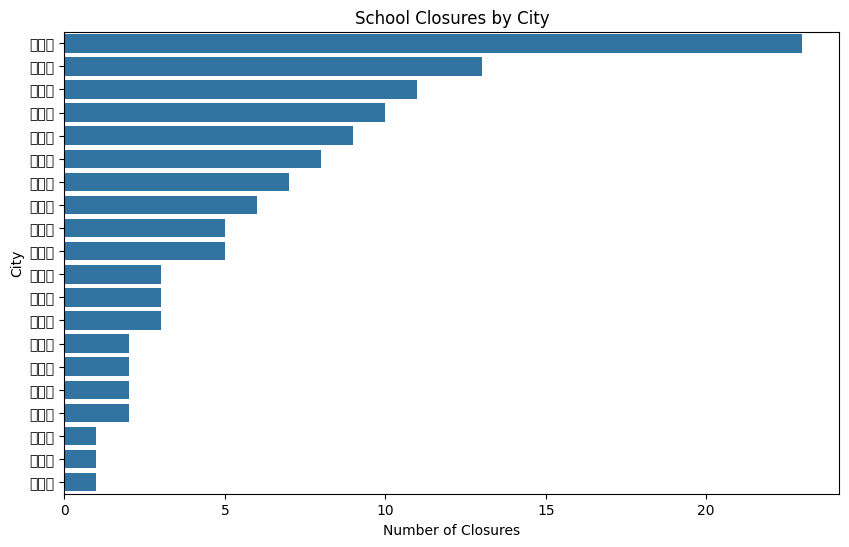

In [179]:
# @title School Closures by City

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=data_close_school, y='시군구명', order=data_close_school['시군구명'].value_counts().index)
plt.title('School Closures by City')
plt.xlabel('Number of Closures')
_ = plt.ylabel('City')

<ipython-input-178-c0398734a571>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data_close_school, x='폐교연도', y='학교급구분명', inner='stick', palette='Dark2')
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54224 (\N{HANGUL SYLLABLE PYE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  func(*arg

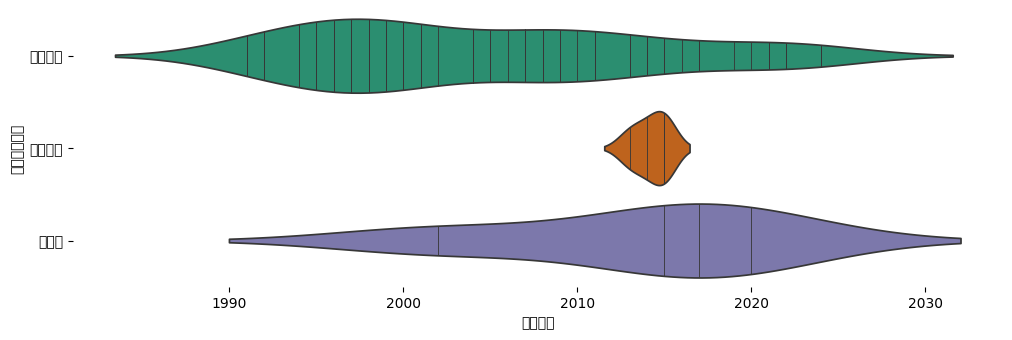

In [178]:
# @title 학교급구분명 vs 폐교연도

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data_close_school['학교급구분명'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data_close_school, x='폐교연도', y='학교급구분명', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54224 (\N{HANGUL SYLLABLE PYE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54224 (\N{HANGUL SYLLABLE PYE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44368 

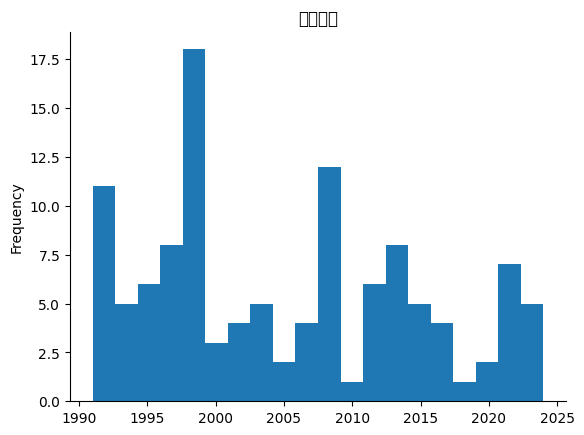

In [177]:
# @title 폐교연도

from matplotlib import pyplot as plt
data_close_school['폐교연도'].plot(kind='hist', bins=20, title='폐교연도')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54224 (\N{HANGUL SYLLABLE PYE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

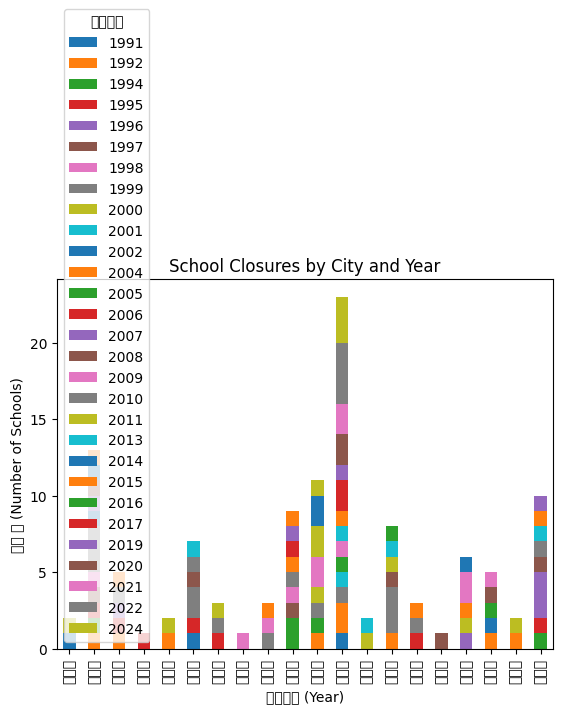

In [175]:
# @title School Closures by City and Year

import matplotlib.pyplot as plt
city_year_counts = data_close_school.groupby(['시군구명', '폐교연도']).size().unstack(fill_value=0)
city_year_counts.plot(kind='bar', stacked=True)
plt.xlabel('폐교연도 (Year)')
plt.ylabel('폐교 수 (Number of Schools)')
_ = plt.title('School Closures by City and Year')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54876 (\N{HANGUL SYLLABLE HWAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

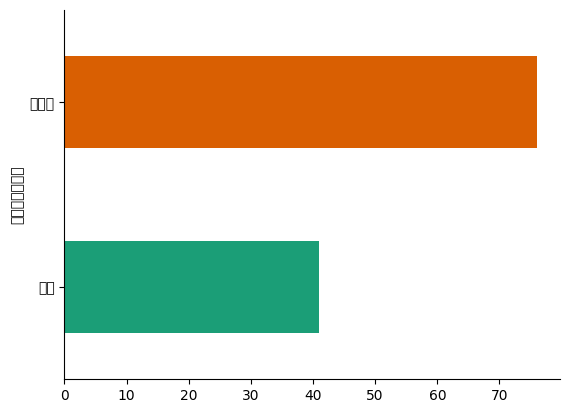

In [176]:

data_close_school.groupby('활용현황구분명').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.rc('font', family='NanumBarunGothic')
plt.show()

## 작은학교 데이터 전처리
1. 삭제할 컬럼 제거
2. '학급수(계)'와 '학생수(계)'에서 괄호와 숫자를 제거

In [ ]:
# data_total_school

In [180]:
drop_cols = ['정보공시 학교코드','학교급코드','제외여부','제외사유']

data_total_school=data_total_school.drop(columns=drop_cols)

data_total_school

,시도교육청,교육지원청,지역,학교명,설립구분,1학년,2학년,3학년,4학년,5학년,6학년,특수학급,순회학급,학급수(계),학생수(계),학급당학생수
0,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 서초구,서울교육대학교부설초등학교,국립,4,4,4,5,5,5,1,0,28(1),611(5),21.8
1,서울특별시교육청,서울특별시중부교육지원청,서울특별시 종로구,서울대학교사범대학부설초등학교,국립,5,5,5,5,5,5,1,0,31(1),576(6),18.6
2,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 강남구,서울개원초등학교,공립,7,4,5,4,5,4,1,0,30(1),868(8),28.9
3,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 강남구,서울개일초등학교,공립,5,5,6,5,6,6,0,0,33(0),967(0),29.3
4,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 강남구,서울개포초등학교,공립,8,7,6,7,7,7,2,0,44(2),903(4),20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,제주특별자치도교육청,제주시교육지원청,제주특별자치도 제주시,월랑초등학교,공립,3,4,3,4,4,5,1,0,24(1),569(8),23.7
6298,제주특별자치도교육청,제주시교육지원청,제주특별자치도 제주시,이도초등학교,공립,6,6,8,7,7,9,1,0,44(1),1096(11),24.9
6299,제주특별자치도교육청,제주시교육지원청,제주특별자치도 제주시,도련초등학교,공립,6,7,8,8,8,8,2,0,47(2),1129(16),24.0
6300,제주특별자치도교육청,제주시교육지원청,제주특별자치도 제주시,삼화초등학교,공립,4,4,5,4,5,6,1,0,29(1),680(5),23.4


In [181]:
# '학급수(계)'와 '학생수(계)'에서 괄호와 숫자를 제거
data_total_school['학급수(계)'] = data_total_school['학급수(계)'].str.extract('(\d+)')  # 괄호 안 숫자 제거하고 숫자만 추출
data_total_school['학생수(계)'] = data_total_school['학생수(계)'].str.extract('(\d+)')

In [182]:
data_total_school

,시도교육청,교육지원청,지역,학교명,설립구분,1학년,2학년,3학년,4학년,5학년,6학년,특수학급,순회학급,학급수(계),학생수(계),학급당학생수
0,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 서초구,서울교육대학교부설초등학교,국립,4,4,4,5,5,5,1,0,28,611,21.8
1,서울특별시교육청,서울특별시중부교육지원청,서울특별시 종로구,서울대학교사범대학부설초등학교,국립,5,5,5,5,5,5,1,0,31,576,18.6
2,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 강남구,서울개원초등학교,공립,7,4,5,4,5,4,1,0,30,868,28.9
3,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 강남구,서울개일초등학교,공립,5,5,6,5,6,6,0,0,33,967,29.3
4,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 강남구,서울개포초등학교,공립,8,7,6,7,7,7,2,0,44,903,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,제주특별자치도교육청,제주시교육지원청,제주특별자치도 제주시,월랑초등학교,공립,3,4,3,4,4,5,1,0,24,569,23.7
6298,제주특별자치도교육청,제주시교육지원청,제주특별자치도 제주시,이도초등학교,공립,6,6,8,7,7,9,1,0,44,1096,24.9
6299,제주특별자치도교육청,제주시교육지원청,제주특별자치도 제주시,도련초등학교,공립,6,7,8,8,8,8,2,0,47,1129,24.0
6300,제주특별자치도교육청,제주시교육지원청,제주특별자치도 제주시,삼화초등학교,공립,4,4,5,4,5,6,1,0,29,680,23.4


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


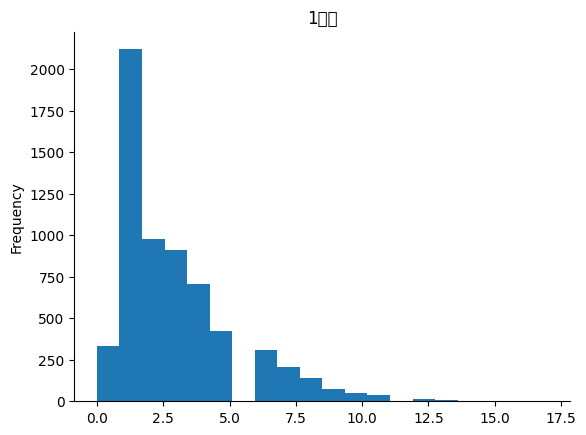

In [186]:
# @title 1학년

from matplotlib import pyplot as plt
data_total_school['1학년'].plot(kind='hist', bins=20, title='1학년')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


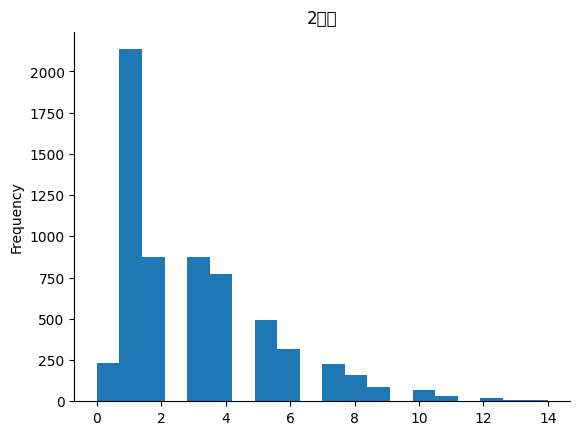

In [187]:
# @title 2학년

from matplotlib import pyplot as plt
data_total_school['2학년'].plot(kind='hist', bins=20, title='2학년')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


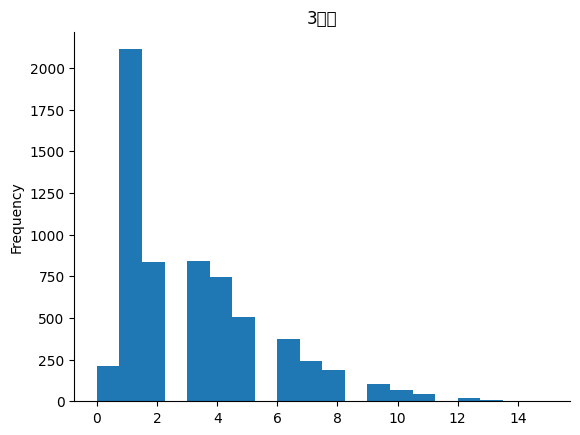

In [188]:
# @title 3학년

from matplotlib import pyplot as plt
data_total_school['3학년'].plot(kind='hist', bins=20, title='3학년')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) 

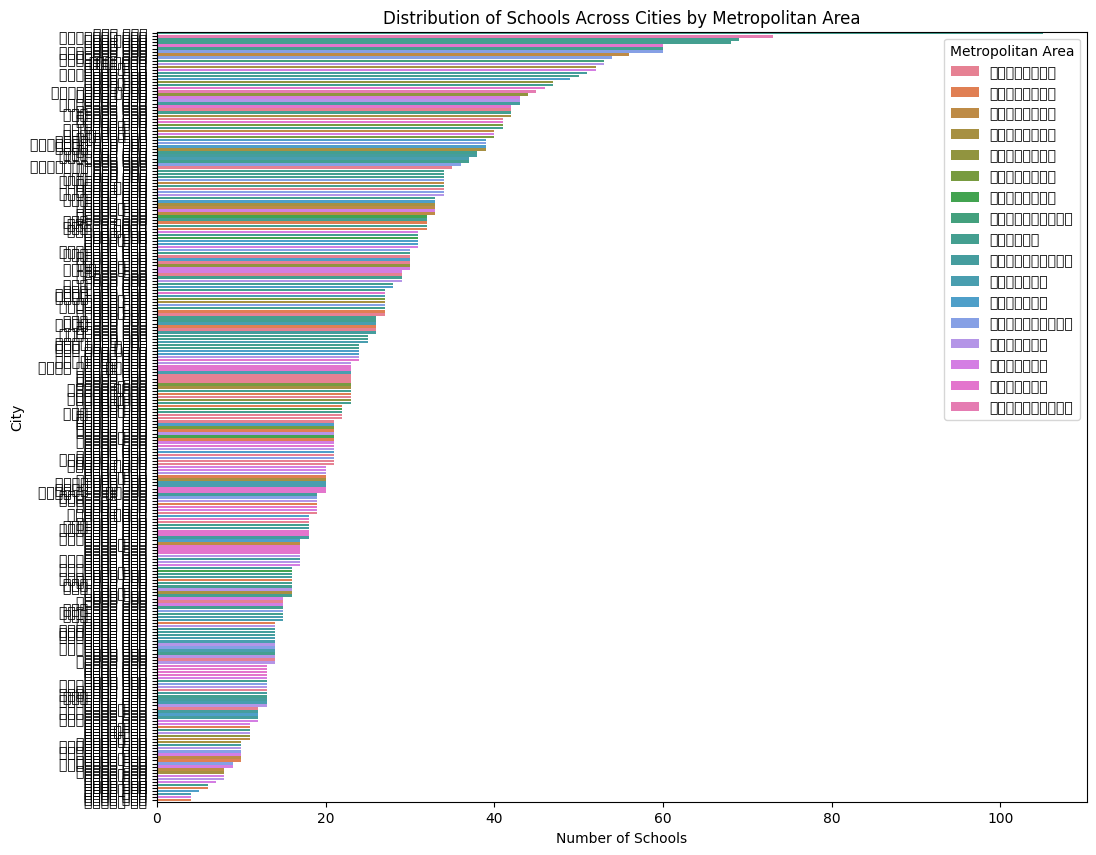

In [184]:
# @title Distribution of Schools Across Cities by Metropolitan Area

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.countplot(data=data_total_school, y='지역', hue='시도교육청', order=data_total_school['지역'].value_counts().index)
plt.title('Distribution of Schools Across Cities by Metropolitan Area')
plt.xlabel('Number of Schools')
plt.ylabel('City')
_ = plt.legend(title='Metropolitan Area')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47549 (\N{HANGUL SYLLABLE RIB}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49444 (\N{HANGUL SYLLABLE SEOL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) mi

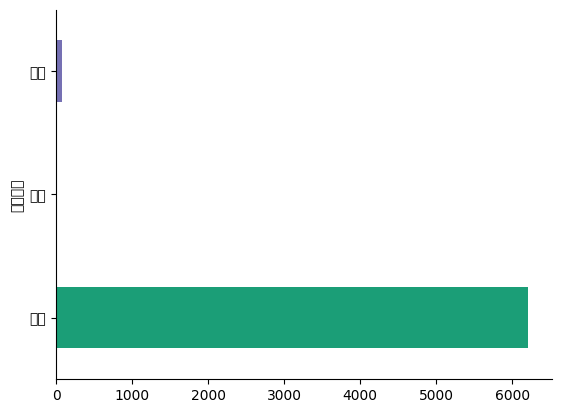

In [185]:
# @title 설립구분

from matplotlib import pyplot as plt
import seaborn as sns
data_total_school.groupby('설립구분').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## 신규 데이터프레임 생성
1. 전국 학교 현황 데이터에서 , 시도교육청 ='전라남도교육청' 인 열들만 구성된 데이터 프레임 생성

In [190]:
# '시도교육청'이 '전라남도교육청'인 행만 필터링
data_target_school = data_total_school[data_total_school['시도교육청'] == '전라남도교육청']
data_target_school

,시도교육청,교육지원청,지역,학교명,설립구분,1학년,2학년,3학년,4학년,5학년,6학년,특수학급,순회학급,학급수(계),학생수(계),학급당학생수
4722,전라남도교육청,전라남도목포교육지원청,전라남도 목포시,광주교육대학교목포부설초등학교,국립,3,3,3,3,3,3,1,0,19,394,20.7
4723,전라남도교육청,전라남도강진교육지원청,전라남도 강진군,강진동초등학교,공립,1,1,1,1,1,1,1,0,7,54,7.7
4724,전라남도교육청,전라남도강진교육지원청,전라남도 강진군,강진중앙초등학교,공립,5,5,6,5,4,4,1,0,30,608,20.3
4725,전라남도교육청,전라남도강진교육지원청,전라남도 강진군,계산초등학교,공립,1,1,1,1,1,1,1,0,7,52,7.4
4726,전라남도교육청,전라남도강진교육지원청,전라남도 강진군,군동초등학교,공립,1,1,1,1,1,1,1,0,7,30,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5165,전라남도교육청,전라남도순천교육지원청,전라남도 순천시,신대초등학교,공립,12,12,11,12,10,11,0,0,68,1849,27.2
5166,전라남도교육청,전라남도나주교육지원청,전라남도 나주시,빛누리초등학교,공립,10,9,12,9,9,10,2,0,61,1402,23.0
5167,전라남도교육청,전라남도무안교육지원청,전라남도 무안군,무안행복초등학교,공립,11,12,12,12,9,9,1,0,66,1636,24.8
5168,전라남도교육청,전라남도광양교육지원청,전라남도 광양시,광양와우초등학교,공립,3,3,2,2,2,2,0,0,14,303,21.6


## 사용할 데이터프레임(중간 보고)* 여기만 보셔도 됩니다

1. data_total_human : 전남 인구수 추이(2015~ 2040)
2. data_close_school: 전남 폐교 학교 정보
3. data_total_school: 전국 학교 데이터
4. data_target_school: 전국 학교 데이터 중에서 '전라남도' 데이터  

In [191]:
data_total_human.head()

,연령별(1),2015,2016,2017,2018,2019,2020,2021,2022,2023,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,계,1796578,1798310,1795036,1796331,1793043,1793108,1782951,1768620,1757262,...,1691353,1684207,1677115,1670005,1662850,1655614,1648264,1640703,1633004,1625140
1,0 - 4세,77867,75751,72465,67561,63060,58050,52933,48568,45151,...,40818,41390,41788,42009,42074,41917,41487,40834,40004,39045
2,5 - 9세,74456,76523,77976,77578,76746,76030,73677,69825,65221,...,37599,37228,37373,38202,39244,40134,40854,41397,41760,41956
3,10 - 14세,87395,80634,77662,76835,75156,76335,78074,78777,78122,...,50991,46919,43649,40820,38737,37795,37462,37686,38620,39766
4,15 - 19세,111225,108852,102937,97192,91205,84097,80653,78695,77682,...,72916,69098,64782,60692,55878,50718,46746,43530,40754,38751


In [ ]:
data_close_school.head()

,시군구명,폐교명,폐교연도,학교급구분명,활용현황구분명,건물연면적,대지
0,강진군,강진서초영파분교장,1991,초등학교,미활용,0,9250
1,강진군,강진북초등학교,2024,초등학교,미활용,2346,20534
2,고흥군,과역동초백일분교장,2007,초등학교,미활용,211,5056
3,고흥군,나로고등학교,2014,고등학교,미활용,3473,21377
4,고흥군,동강초매곡분교장,1997,초등학교,미활용,1130,13278


In [ ]:
data_total_school.head()

,시도교육청,교육지원청,지역,학교명,설립구분,1학년,2학년,3학년,4학년,5학년,6학년,특수학급,순회학급,학급수(계),학생수(계),학급당학생수
0,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 서초구,서울교육대학교부설초등학교,국립,4,4,4,5,5,5,1,0,28,611,21.8
1,서울특별시교육청,서울특별시중부교육지원청,서울특별시 종로구,서울대학교사범대학부설초등학교,국립,5,5,5,5,5,5,1,0,31,576,18.6
2,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 강남구,서울개원초등학교,공립,7,4,5,4,5,4,1,0,30,868,28.9
3,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 강남구,서울개일초등학교,공립,5,5,6,5,6,6,0,0,33,967,29.3
4,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 강남구,서울개포초등학교,공립,8,7,6,7,7,7,2,0,44,903,20.5


In [ ]:
data_target_school.head()

,시도교육청,교육지원청,지역,학교명,설립구분,1학년,2학년,3학년,4학년,5학년,6학년,특수학급,순회학급,학급수(계),학생수(계),학급당학생수
4722,전라남도교육청,전라남도목포교육지원청,전라남도 목포시,광주교육대학교목포부설초등학교,국립,3,3,3,3,3,3,1,0,19,394,20.7
4723,전라남도교육청,전라남도강진교육지원청,전라남도 강진군,강진동초등학교,공립,1,1,1,1,1,1,1,0,7,54,7.7
4724,전라남도교육청,전라남도강진교육지원청,전라남도 강진군,강진중앙초등학교,공립,5,5,6,5,4,4,1,0,30,608,20.3
4725,전라남도교육청,전라남도강진교육지원청,전라남도 강진군,계산초등학교,공립,1,1,1,1,1,1,1,0,7,52,7.4
4726,전라남도교육청,전라남도강진교육지원청,전라남도 강진군,군동초등학교,공립,1,1,1,1,1,1,1,0,7,30,4.3


### (3) 다변량 분석 함수

In [ ]:
def categorical_numerical(df, feature, target) : # 범주형 , 숫자형 변수간 검정  (t-test, Anova) / 막대그래프 시각화 /

    '''
    df = 데이터프레임
    feature = 구분 데이터프레임의 컬럼명
    target  = 목표 데이터프레임의 컬럼명
    '''

    sns.barplot(x = feature, y = target, data = df)
    plt.grid()
    plt.show()

    an_list = []
    for i in range(df[feature].nunique()) :
        an_list.append(df.loc[df[feature] == i, target])

    if len(an_list) == 2:
    # t-test
        t_stat, p_value = spst.ttest_ind(an_list[0], an_list[1])
        print(f"T-test 결과: t-statistic = {t_stat}, p-value = {p_value}")

    elif len(an_list) > 2:
    # ANOVA
        f_stat, p_value = spst.f_oneway(*an_list)
        print(f"ANOVA 결과: F-statistic = {f_stat}, p-value = {p_value}")

    else:
        print("비교할 그룹이 부족합니다.")

def categorical_categorical(df , feature , target): # 범주형 --> 범주형 간 검정 (카이제곱검정) / 모자이크플롯
    '''
    df = 데이터프레임
    feature = 구분 데이터프레임의 컬럼명
    target  = 목표 데이터프레임의 컬럼명
    '''
    mosaic(df, [ feature,target])
    #plt.axhline(1- df[target].mean(), color = 'r')
    plt.grid()
    plt.show()

    # 먼저 집계
    table = pd.crosstab(df[target], df[feature])
    print('교차표\n', table)
    print('=' * 100)

    # 카이제곱검정
    result = spst.chi2_contingency(table)
    print('카이제곱통계량', result[0])
    print('p-value', result[1])
    print('자유도', result[2])
    # print('기대빈도\n',result[3])



def numerical_numerical(df, feature , target): # 숫자형 , 숫자형
    # 산점도 + 회귀분석 선 표기

    '''
    df = 데이터프레임
    feature = 구분 데이터프레임의 컬럼명
    target  = 목표 데이터프레임의 컬럼명
    '''
    sns.regplot(x=feature, y = target, data = df)
    plt.grid()
    plt.show()
    print('='*100)
    result = spst.pearsonr(df[feature], df[target])
    print(f'상관계수 : {result[0]}, p-value : {result[1]}')


def numerical_numerical_hitmap(df):
    '''
    df = 데이터프레임
    feature = 구분 데이터프레임의 컬럼명
    target  = 목표 데이터프레임의 컬럼명
    '''
    # 숫자형으로 구성된 데이터들 한해서만 상관분석 수행
    temp = df.select_dtypes(include=['number'])
    plt.figure(figsize = (8, 8))
    # 한글 폰트 설정: 맑은 고딕
    plt.rcParams['font.family'] = 'Malgun Gothic'
    # 유니코드 마이너스 사용 설정
    plt.rcParams['axes.unicode_minus'] = False
    sns.heatmap(temp.corr(),
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.2f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값
    plt.show()

### (4) 데이터 시각화
1. data_total_human : 전남 인구수 추이(2015~ 2040)
2. data_close_school: 전남 폐교 학교 정보
3. data_total_school: 전국 학교 데이터
4. data_target_school: 전국 학교 데이터 중에서 '전라남도' 데이터

In [ ]:
# 전남 인구수 추이